Algoritmo de PCA: Este código toma el famoso set de datos "Iris" (que describe flores con 4 características numéricas: largo y ancho del sépalo, largo y ancho del pétalo) y lo "aplasta" a solo 2 dimensiones para que podamos graficarlo en una pantalla.

Dimensiones originales: 4 (Largo Sépalo, Ancho Sépalo, Largo Pétalo, Ancho Pétalo)
Dimensiones después de PCA: 2


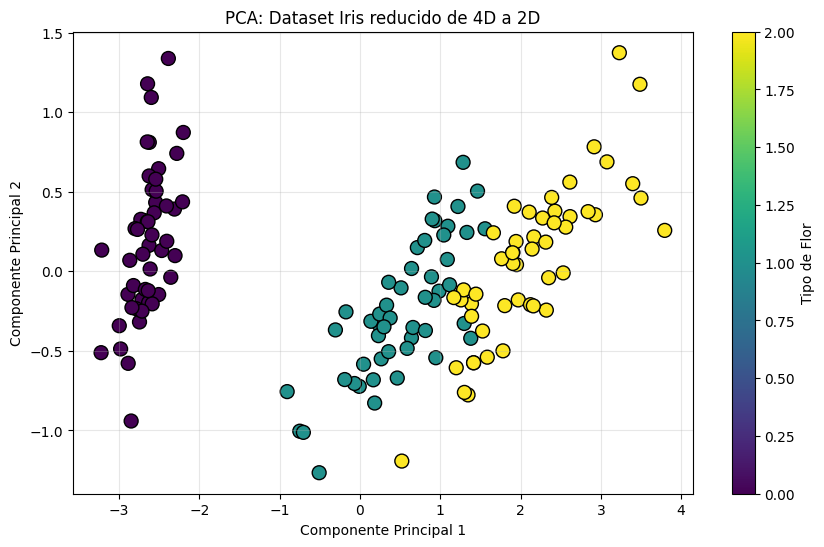

Información (varianza) conservada: 97.77%


In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# 1. Cargar datos de ejemplo (4 dimensiones originales)
iris = load_iris()
X = iris.data  # Las características (números)
y = iris.target # Las etiquetas (solo para colorear el gráfico después)

print(f"Dimensiones originales: {X.shape[1]} (Largo Sépalo, Ancho Sépalo, Largo Pétalo, Ancho Pétalo)")

# 2. Inicializar y aplicar PCA
# Le pedimos que reduzca toda la información a solo 2 Componentes Principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print(f"Dimensiones después de PCA: {X_pca.shape[1]}")

# 3. Visualizar el resultado
plt.figure(figsize=(10, 6))
# Graficamos usando las 2 nuevas variables creadas por PCA
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA: Dataset Iris reducido de 4D a 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Tipo de Flor')
plt.grid(True, alpha=0.3)
plt.show()

# Ver cuánta información se conservó
print(f"Información (varianza) conservada: {sum(pca.explained_variance_ratio_):.2%}")


Algoritmo de GMM: Este código genera manchas de datos sintéticos y utiliza GMM para descubrir automáticamente a qué grupo pertenece cada punto. A diferencia de otros métodos, GMM funciona muy bien incluso si los grupos están solapados.

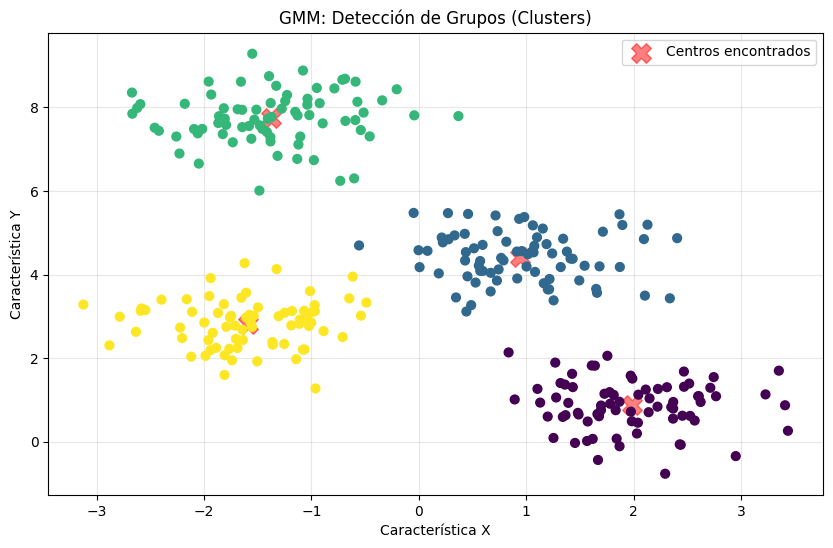

¿El modelo logró converger?: True
Iteraciones necesarias: 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# 1. Generar datos "falsos" (4 grupos de puntos)
# Creamos 300 puntos distribuidos en 4 centros
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 2. Inicializar y entrenar GMM
# Le decimos que busque 4 componentes (grupos)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(X)

# Predecir la etiqueta para cada punto
labels = gmm.predict(X)

# 3. Visualizar los resultados
plt.figure(figsize=(10, 6))

# Dibujamos los puntos coloreados según el grupo que GMM encontró
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

# Opcional: Dibujar los centros encontrados (las medias de las gaussianas)
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X', label='Centros encontrados')

plt.title('GMM: Detección de Grupos (Clusters)')
plt.xlabel('Característica X')
plt.ylabel('Característica Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Verificación de convergencia
print(f"¿El modelo logró converger?: {gmm.converged_}")
print(f"Iteraciones necesarias: {gmm.n_iter_}")
